<a href="https://colab.research.google.com/github/saisabari140104-cmd/Kmeans/blob/main/Copy_of_Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Loading and Preprocessing Data ---
Data loaded and standardized.

--- Running Elbow Method ---


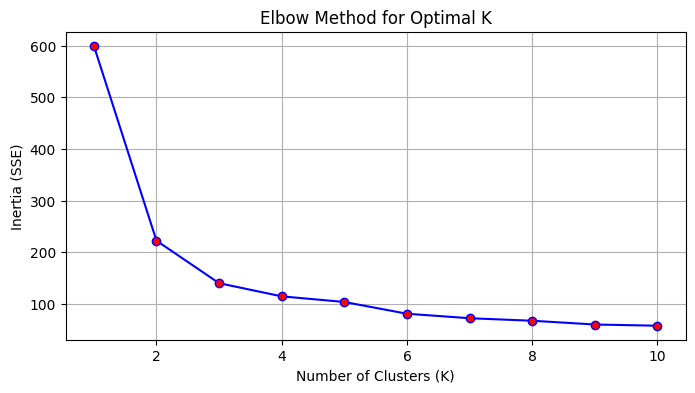

Chosen K for analysis: 3

--- Comparing Custom vs Scikit-Learn (K=3) ---
Custom Implementation Inertia: 140.0328
Scikit-Learn Inertia:          139.8254
Difference in Inertia:         0.2073
>> SUCCESS: The custom implementation matches industry standards closely.

--- Generating Visualizations ---


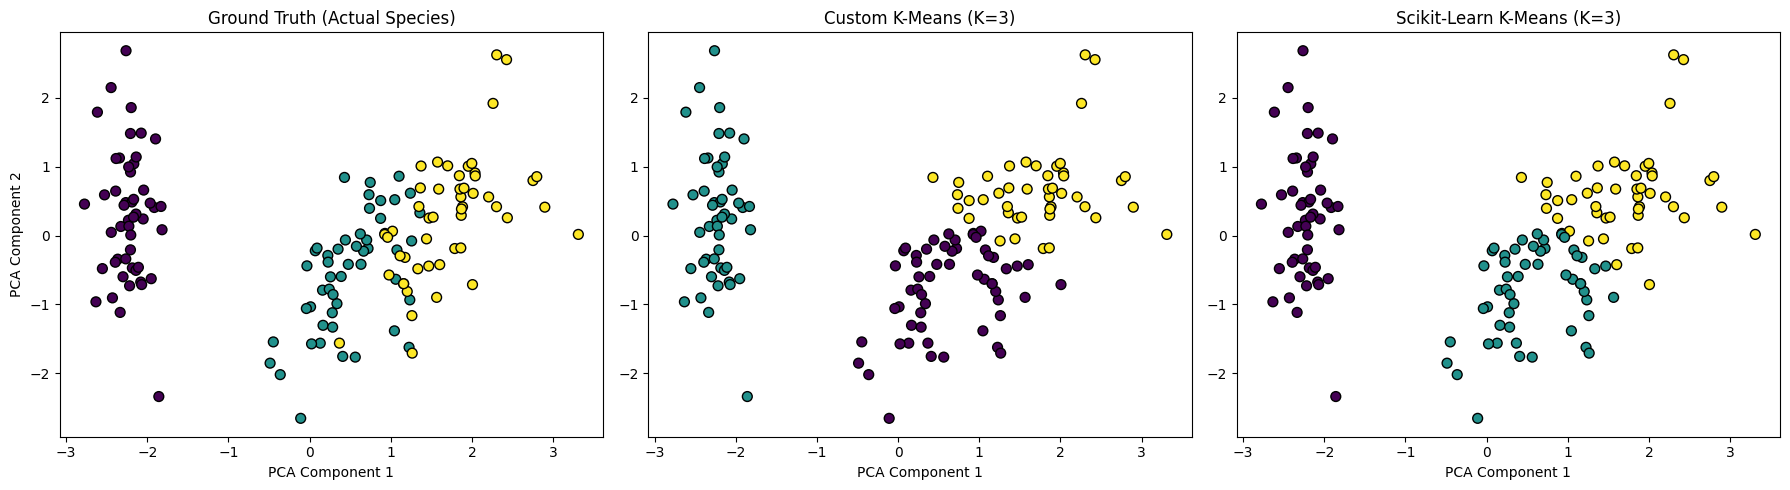

Execution Complete.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as SklearnKMeans

# ==========================================
# 1. Custom K-Means Implementation (Task 1)
# ==========================================
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        self.k = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia_ = 0  # To store Sum of Squared Errors (SSE)
        np.random.seed(random_state)

    def fit(self, X):
        # Step 1: Random Initialization
        # Randomly select k data points as initial centroids
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for i in range(self.max_iter):
            # Step 2: Assignment Step
            # Calculate Euclidean distance from each point to each centroid
            # labels will contain the index of the nearest centroid for each point
            self.labels = self._assign_clusters(X)

            # Step 3: Update Step
            # Calculate new centroids as the mean of points in each cluster
            new_centroids = np.array([
                X[self.labels == j].mean(axis=0)
                if np.sum(self.labels == j) > 0 else self.centroids[j] # Handle empty clusters
                for j in range(self.k)
            ])

            # Check for convergence (if centroids barely move)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                self.centroids = new_centroids
                break

            self.centroids = new_centroids

        # Calculate final Inertia (Sum of Squared Distances to nearest centroid)
        self.inertia_ = self._calculate_inertia(X)

    def _assign_clusters(self, X):
        # Vectorized distance calculation
        # Result shape: (n_samples, k)
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _calculate_inertia(self, X):
        inertia = 0
        for j in range(self.k):
            points = X[self.labels == j]
            if len(points) > 0:
                inertia += np.sum((points - self.centroids[j])**2)
        return inertia

# ==========================================
# 2. Load and Preprocess Data (Task 2)
# ==========================================
print("--- Loading and Preprocessing Data ---")
iris = datasets.load_iris()
X = iris.data
y_true = iris.target  # Used only for final visual comparison, not training

# Standardization is crucial for distance-based algorithms like K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data loaded and standardized.")

# ==========================================
# 3. K-Selection: The Elbow Method (Task 3)
# ==========================================
print("\n--- Running Elbow Method ---")
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    temp_model = KMeansScratch(n_clusters=k, random_state=42)
    temp_model.fit(X_scaled)
    inertia_values.append(temp_model.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia_values, 'bo-', markerfacecolor='red')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()

# Based on the Elbow plot and knowing the Iris dataset, we choose K=3
CHOSEN_K = 3
print(f"Chosen K for analysis: {CHOSEN_K}")

# ==========================================
# 4. Comparison with Scikit-Learn (Task 4)
# ==========================================
print(f"\n--- Comparing Custom vs Scikit-Learn (K={CHOSEN_K}) ---")

# Run Custom Implementation
custom_model = KMeansScratch(n_clusters=CHOSEN_K, random_state=42)
custom_model.fit(X_scaled)

# Run Scikit-Learn Implementation
sklearn_model = SklearnKMeans(n_clusters=CHOSEN_K, init='random', n_init=10, random_state=42)
sklearn_model.fit(X_scaled)

print(f"Custom Implementation Inertia: {custom_model.inertia_:.4f}")
print(f"Scikit-Learn Inertia:          {sklearn_model.inertia_:.4f}")

difference = abs(custom_model.inertia_ - sklearn_model.inertia_)
print(f"Difference in Inertia:         {difference:.4f}")

if difference < 1.0:
    print(">> SUCCESS: The custom implementation matches industry standards closely.")
else:
    print(">> NOTE: Small differences may occur due to random initialization strategies.")

# ==========================================
# 5. Visualization using PCA (Task 5)
# ==========================================
print("\n--- Generating Visualizations ---")

# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a subplot comparing True Labels, Custom K-Means, and Sklearn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual Species (Ground Truth)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolor='k', s=50)
axes[0].set_title("Ground Truth (Actual Species)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Plot 2: Custom K-Means
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=custom_model.labels, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title(f"Custom K-Means (K={CHOSEN_K})")
axes[1].set_xlabel("PCA Component 1")

# Plot 3: Scikit-Learn
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=sklearn_model.labels_, cmap='viridis', edgecolor='k', s=50)
axes[2].set_title(f"Scikit-Learn K-Means (K={CHOSEN_K})")
axes[2].set_xlabel("PCA Component 1")

plt.tight_layout()
plt.show()

print("Execution Complete.")